In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# **Campo eléctrico**

La función "campo" toma un punto (definido como un arreglo), la posición de una partícula con carga (también definida como un arreglo) y su carga para calcular el vector de campo en el punto, también pude recibir en lugar de la posición de la partícula y su carga una lista de posiciones y sus respectivas cargas.

In [2]:
#la función campo puede recibir también vectores 3-dimensionales y en general no dará error con vectores n-dimensionales.
#  p : coordenada del punto sebre el que se quiere calcular el campo
# vq : coordenada de la partícula con carga
#  q : carga de la partícula

  #mod=0 : la función solo recibe números como argumentos.
    #Retorna un arreglo unidimensional con las coordenadas del vector de campo en p.

  #mod=1 : la función, ahora vq y q representan un arreglo de coordenadas de partículas y sus respectivas cargas.
    #Retorna las coordenadas del campo en p.

  #mod=2 : similar a mod 1, pero ahora p es una lista de puntos en el espacio.
    #Retorna un arreglo con los valores del campo en cada punto.

def campo(p,vq,q,mod=0):
  if mod==0:
    return (8.9875517873681764e9)*((q)/(np.linalg.norm(p-vq))**3)*(p-vq)


  elif mod==1:
    s=np.zeros(len(vq[0]))
    for i in range(0,len(vq)):
      s=s+(8.9875517873681764e9)*((q[i])/(np.linalg.norm(p-vq[i]))**3)*(p-vq[i])
    return s


  elif mod==2:
    r=[]
    for n in range(0,len(p)):
      s=a=np.zeros(len(vq[1]))
      for i in range(0,len(vq)):
        if ((p[n]-vq[i])==a).all():
          s=s+a
        else:
          s=s+(8.9875517873681764e9)*((q[i])/(np.linalg.norm(p[n]-vq[i]))**3)*(p[n]-vq[i])
      r=r+[s]
    return np.array(r)


##ejemplo para testear la función:
p=np.array([0,0])
vq=np.array([[-1,2],[2,2]])
q=np.array([2e-6,-2e-6])

campo(p,vq,q,1) #resultado esperado: 3196.5,-1626.7

array([ 3196.53184361, -1626.69457588])

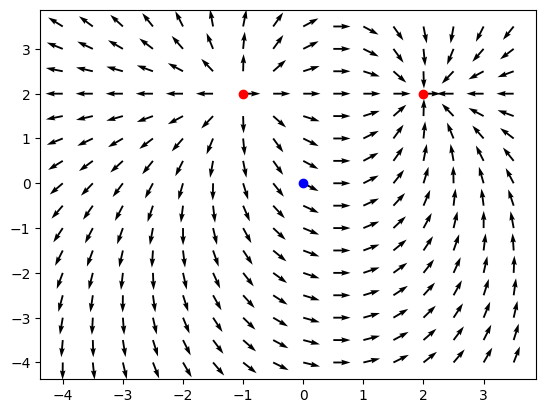

In [12]:

intervalo=np.arange(-4, 4, .5)

#uso de la función product de la librería itertools para crear un arreglo de puntos p uniformemente distribouidos en el espacio.
puntos_p=np.asarray(list(product(intervalo,intervalo)))

x, y=(puntos_p[:,0],puntos_p[:,1])

campos=campo(puntos_p,vq,q,2)

for i in range(len(campos)):
  campos[i]=campos[i](campos[i][1]**2+campos[i][0]**2)**0.5

u=campos[:,0]
v=campos[:,1]

plt.figure()
plt.plot(p[0],p[1],"bo")
for i in range(0,len(vq)):
  plt.plot(vq[i][0],vq[i][1],"ro")
plt.quiver(x,y,u,v)
plt.show()


<ipython-input-15-30f9136b821a>:7: RuntimeWarning: invalid value encountered in divide
  ccampos[i]=ccampos[i]/(ccampos[i][1]**2+ccampos[i][0]**2)**0.5


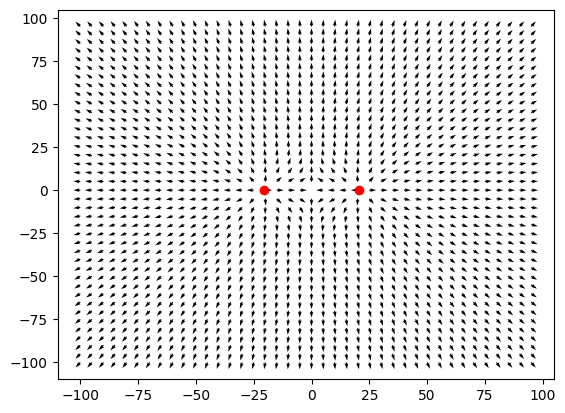

In [15]:
iintervalo=intervalo=np.arange(-100, 100, 5)
ppuntos=np.asarray(list(product(iintervalo,iintervalo)))
px,py=(ppuntos[:,0],ppuntos[:,1])
ccampos=campo(ppuntos,np.array([[-20.5,0],[20.5,0]]),np.array([[1e-11],[1e-11]]),2)

for i in range(len(ccampos)):
  ccampos[i]=ccampos[i]/(ccampos[i][1]**2+ccampos[i][0]**2)**0.5

cx=(ccampos[:,0])**(1)
cy=(ccampos[:,1])**(1)

plt.figure()
for i in range(0,len(np.array([[-20.5,0],[20.5,0]]))):
  plt.plot(np.array([[-20.5,0],[20.5,0]])[i][0],np.array([[-20.5,0],[20.5,0]])[i][1],"ro")
plt.quiver(px,py,cx,cy)
plt.show()